In [1]:
import pandas as pd
from datetime import datetime

In [2]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
# getting the tesla stock price in last year 
df = yf.download('TSLA', start='2017-02-27', end='2022-02-25')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


<Axes: xlabel='Date'>

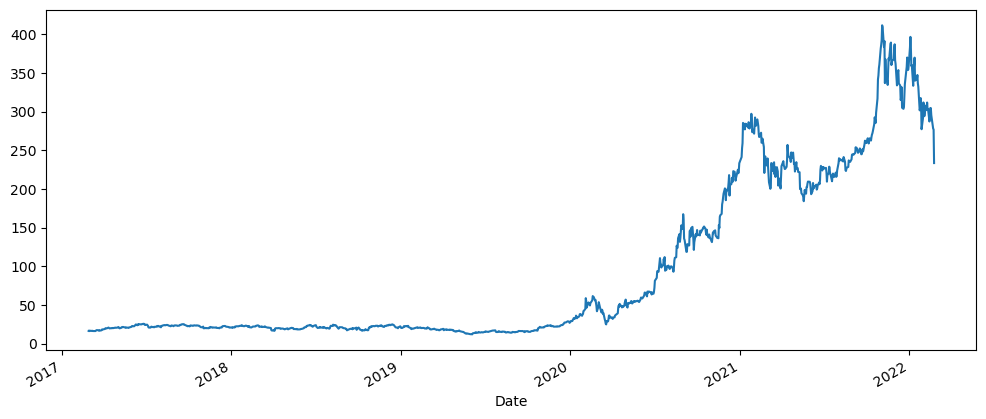

In [4]:
df['Open'].plot(figsize=(12,5))

## 1. Simple Moving Average
The Simple Moving Average (SMA) is the average of a fixed number of past values in a time series. It smooths out short-term fluctuations and highlights longer-term trends. The "moving" part means you calculate the average over a window that slides along the time series.

Lets take 10 days data to decide what will be the future data 
Basically we will be using last 10 days average to predict the new value.

In [21]:
df['Open:10 days rolling'] = df['Open'].rolling(window=10).mean()

In [22]:
df[['Open','Open:10 days rolling']].head(12) #look at values... starts once we have 10 

,Open,Open:10 days rolling
Date,,
2017-02-27,16.544666,NaN
2017-02-28,16.279333,NaN
2017-03-01,16.945333,NaN
2017-03-02,16.647333,NaN
2017-03-03,16.716000,NaN
2017-03-06,16.527332,NaN
2017-03-07,16.794666,NaN
2017-03-08,16.466667,NaN
2017-03-09,16.508667,NaN


<Axes: xlabel='Date'>

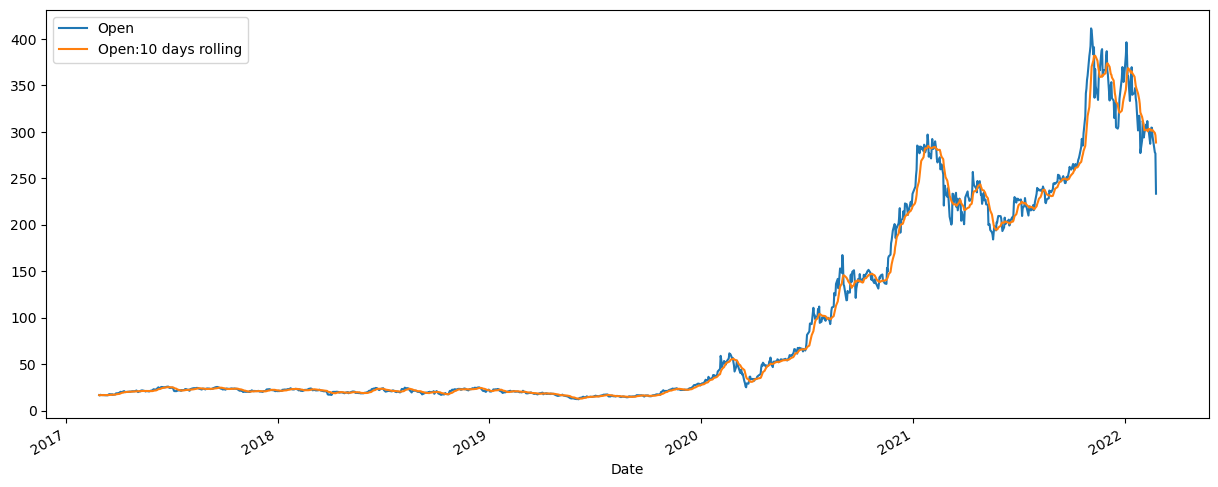

In [8]:
df[['Open','Open:10 days rolling']].plot(figsize=(15,6))

30 days rolling might give better results

In [9]:
df['Open:30 days rolling'] = df['Open'].rolling(window=30,min_periods=1).mean()

<Axes: xlabel='Date'>

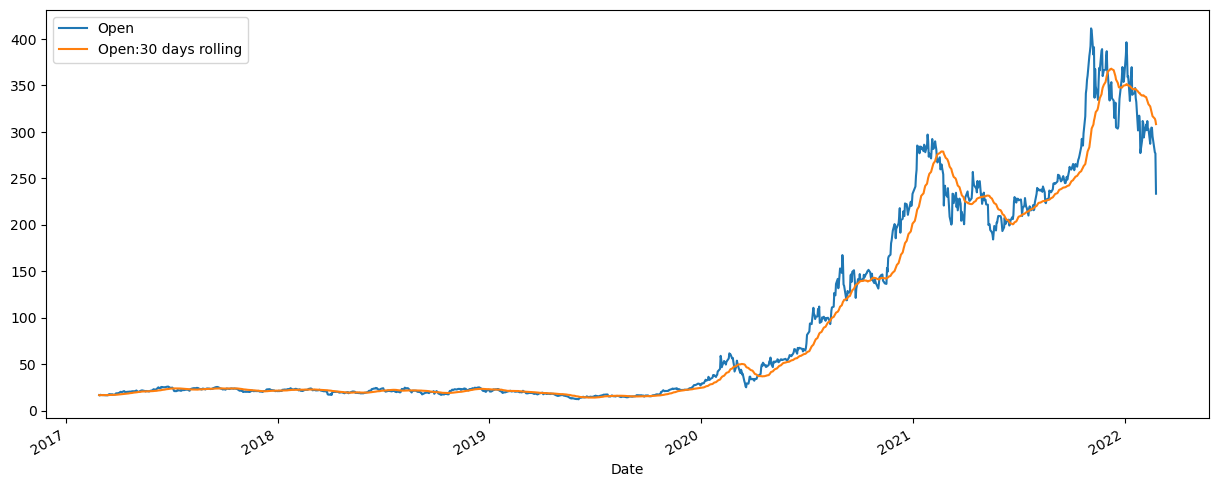

In [10]:
df[['Open','Open:30 days rolling']].plot(figsize=(15,6))

lets compare 10 days and 30 days

<Axes: xlabel='Date'>

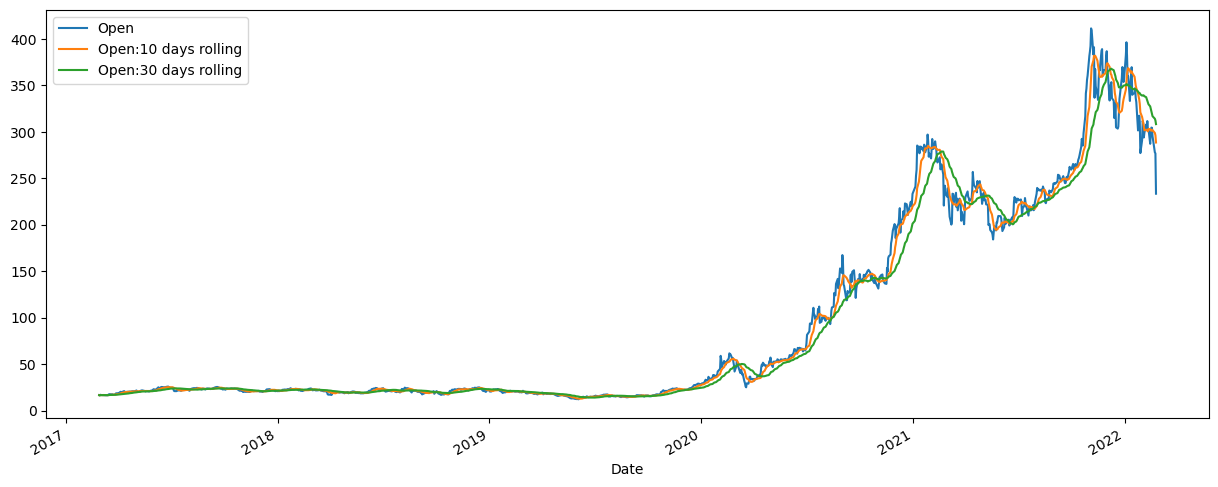

In [11]:
df[['Open','Open:10 days rolling','Open:30 days rolling']].plot(figsize=(15,6))

as we can see actually 10 days is fitting better than 30 days, this is because the mean is pushing our graph towards right when the values are adding up. Peakes comes after some time.

In [12]:
df['Open:50 days rolling'] = df['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

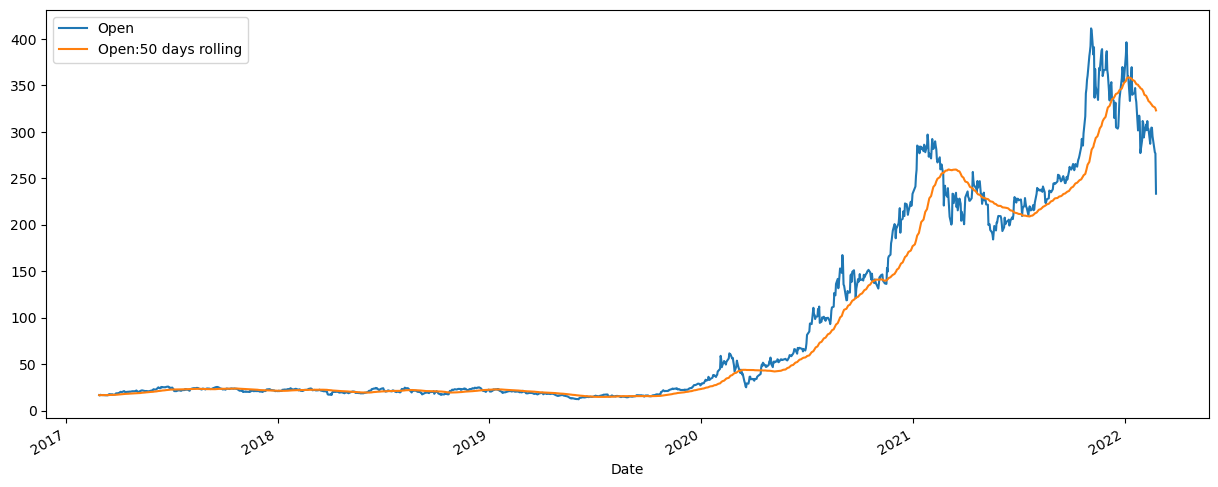

In [14]:
df[['Open','Open:50 days rolling']].plot(figsize=(15,6))

As we take more number of days for the moving average the smootheness of curve is increasing as more number of values is not letting the data fluctuate.

Lets once look at all the rollings at once to get a clear picture.

<Axes: xlabel='Date'>

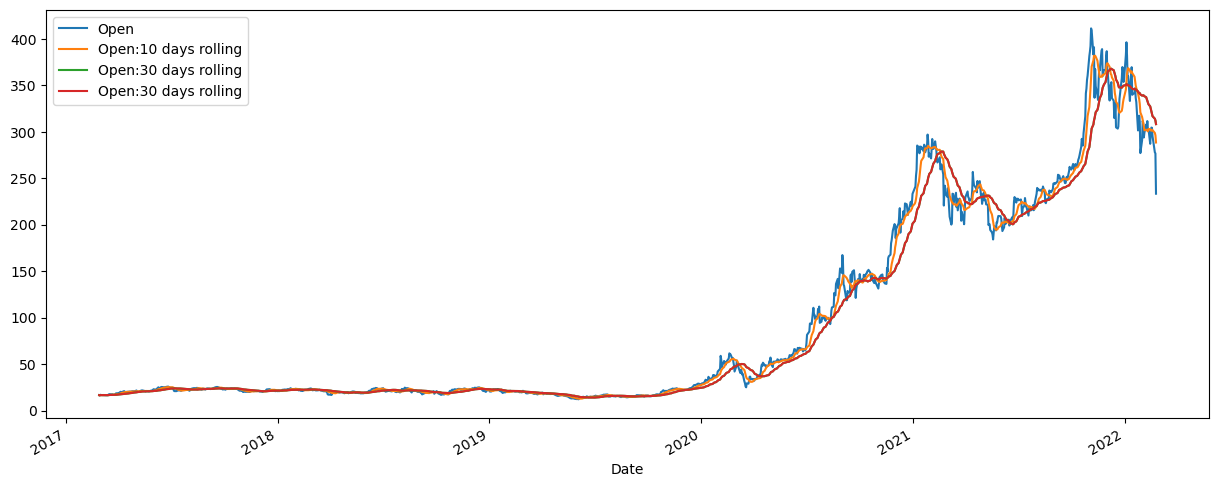

In [15]:
df[['Open','Open:10 days rolling','Open:30 days rolling','Open:30 days rolling']].plot(figsize=(15,6))

## 2. Cumulative Moving Average(CMA)
The Cumulative Moving Average (CMA) considers all past values up to the current point. It gives an average that includes all data points from the beginning of the time series to the current point, continuously updating as new data comes in.


In [24]:
df['Open: Cumulative Average'] = df['Open'].expanding().mean()

In [26]:
df[['Open: Cumulative Average','Open']]

,Open: Cumulative Average,Open
Date,,
2017-02-27,16.544666,16.544666
2017-02-28,16.412000,16.279333
2017-03-01,16.589778,16.945333
2017-03-02,16.604167,16.647333
2017-03-03,16.626533,16.716000
...,...,...
2022-02-17,91.759044,304.420013
2022-02-18,91.921126,295.333344
2022-02-22,92.069194,278.043335


<Axes: xlabel='Date'>

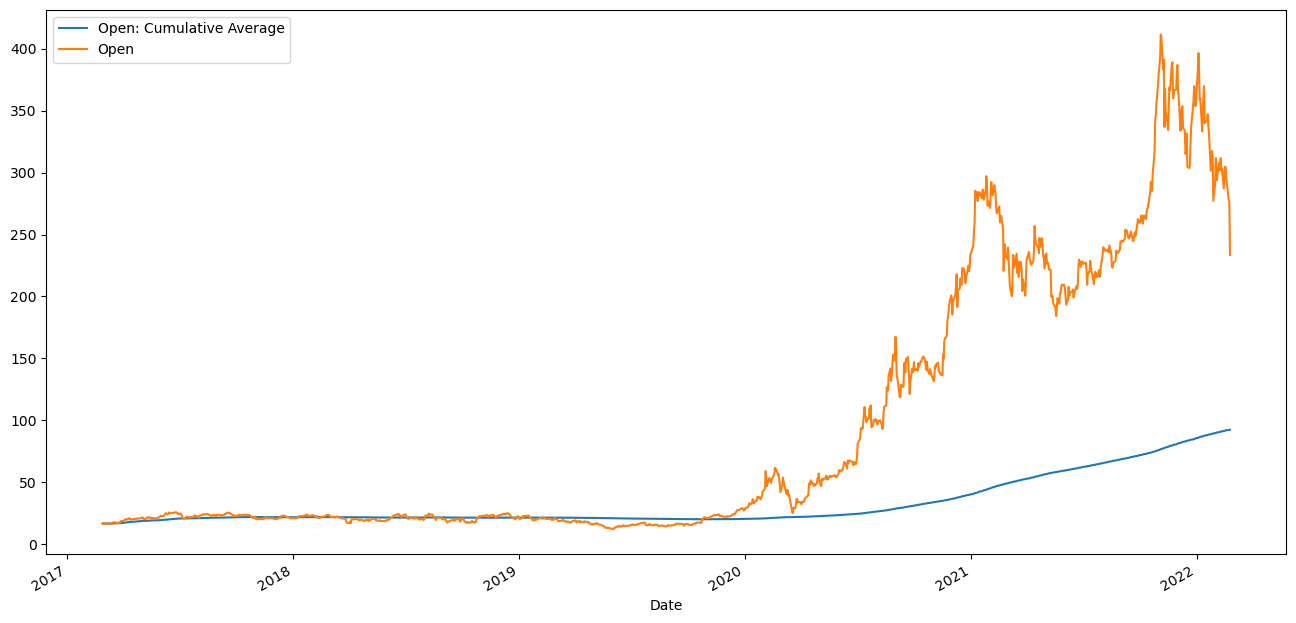

In [27]:
df[['Open: Cumulative Average','Open']].plot(figsize=(16,8))

We can see that this is even worse than SMA. We need a algorithm which will give more weightage/importance to the recent data as it will affect the current value more than any other

## 3. Exponential Weighted Moving Average

The Exponential Moving Average (EMA) gives more weight to recent values, making it more responsive to recent changes in the time series. Unlike SMA, it considers all past data points but with exponentially decreasing weights.

Formula:
EMA(t) = k.y(t) + (1-k)EMA(t-1)

k = 2/(n+1)
where n = window

In [29]:
df['EMA_0.1'] = df['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

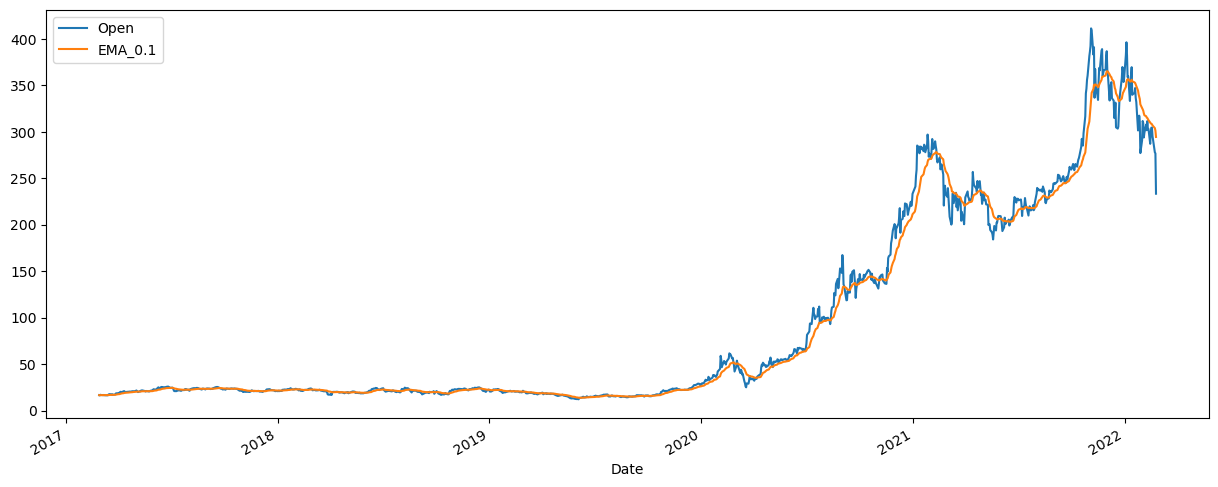

In [30]:
df[['Open','EMA_0.1']].plot(figsize=(15,6))

In [31]:
df['EMA_0.3'] = df['Open'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

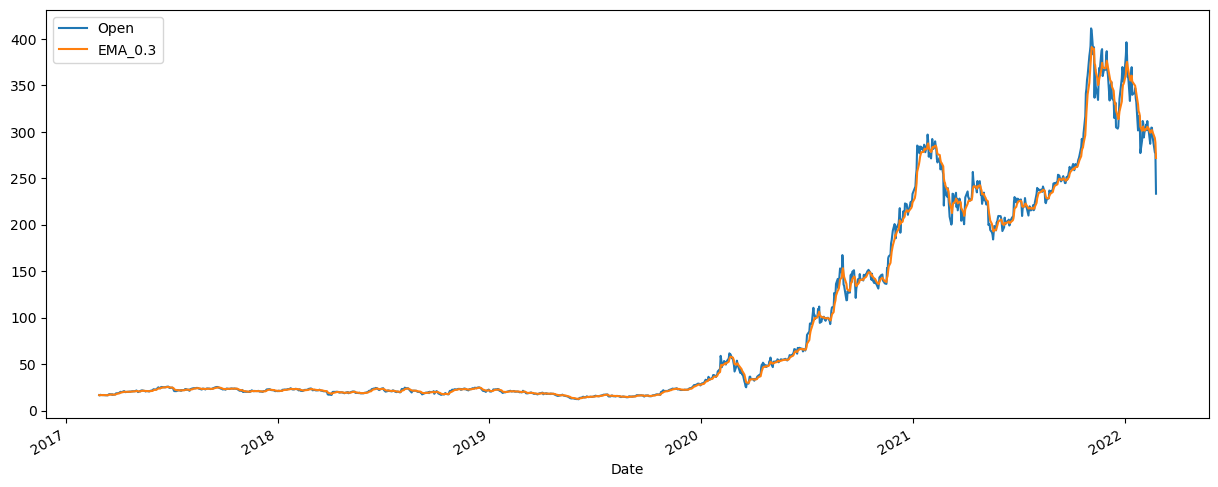

In [32]:
df[['Open','EMA_0.3']].plot(figsize=(15,6))

In [33]:
df['EMA_0.4'] = df['Open'].ewm(alpha=0.4,adjust=False).mean()

<Axes: xlabel='Date'>

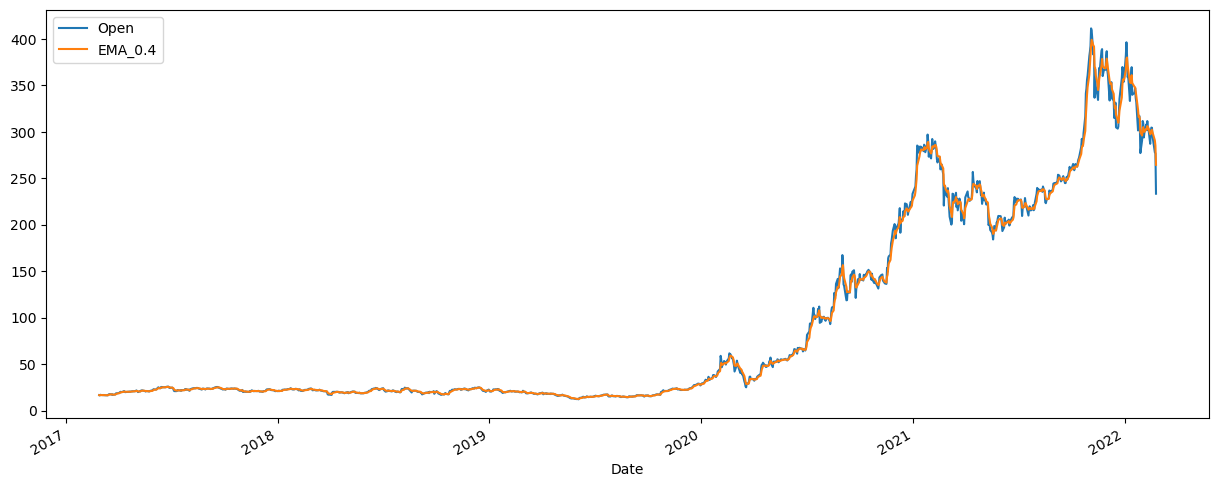

In [35]:
df[['Open','EMA_0.4']].plot(figsize=(15,6))

we can see better performance

<Axes: xlabel='Date'>

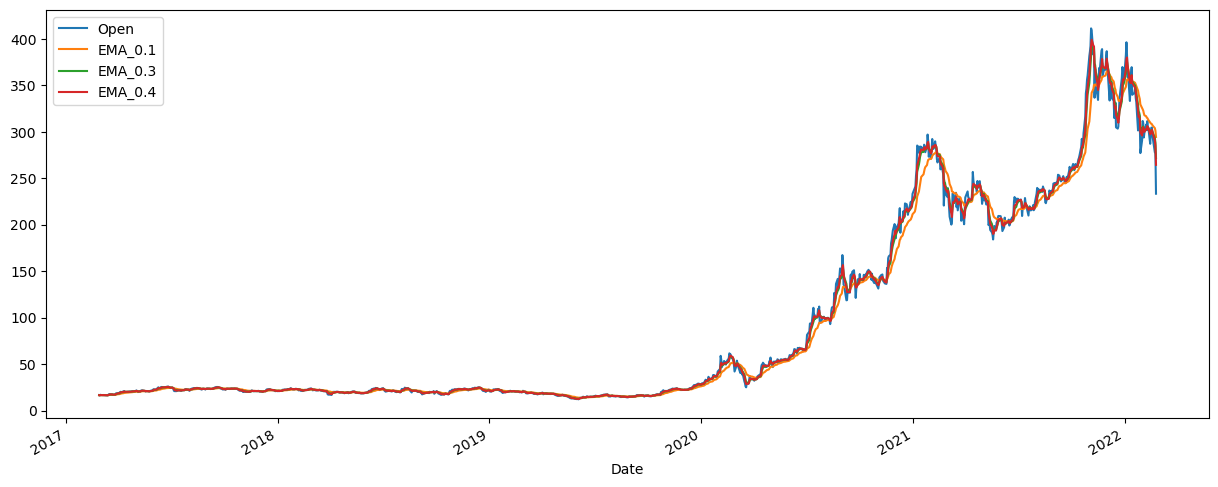

In [37]:
df[['Open','EMA_0.1','EMA_0.3','EMA_0.4']].plot(figsize=(15,6))

### Weighted Average for some days only (window the exponential Weight)

In [38]:
# 5 days exponentially moving average
# alpha or k = 2/(span+1)
df['EMA_5days'] = df['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

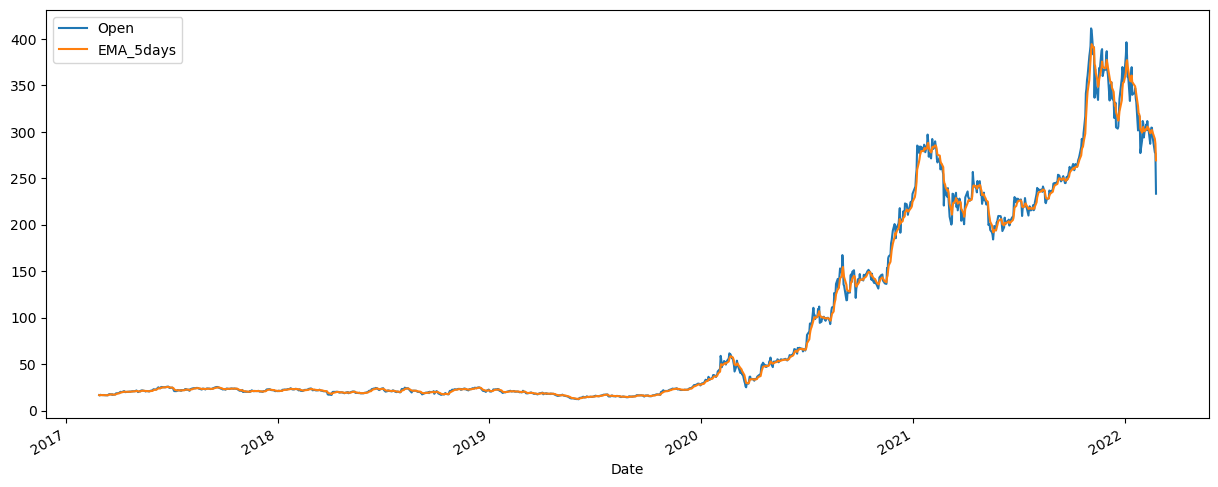

In [39]:
df[['Open','EMA_5days']].plot(figsize=(15,6))